# Chapter 1. Introduction

## Motivating Hypothetical: DataSciencester

### Finding Key Connectors

In [1]:
users = [
    {'id': 0, 'name': 'Hero'},
    {'id': 1, 'name': 'Dunn'},
    {'id': 2, 'name': 'Sue'},
    {'id': 3, 'name': 'Chi'},
    {'id': 4, 'name': 'Thor'},
    {'id': 5, 'name': 'Clive'},
    {'id': 6, 'name': 'Hicks'},
    {'id': 7, 'name': 'Devin'},
    {'id': 8, 'name': 'Kate'},
    {'id': 9, 'name': 'Klein'}
]

friendship_pairs = [(0, 1), (0, 2), (1, 2), (1, 3), (2, 3), (3, 4), (4, 5), (5, 6), (5, 7), (6, 8), (7, 8), (8, 9)]

In [8]:
# Initialize the dict with an empty list for each user id:
friendships = {user['id']: []
               for user in users}

# And loop over the friendship pairs to populate it:
for i, j in friendship_pairs:
    friendships[i].append(j)  # Add j as a friend of user i
    friendships[j].append(i)  # Add i as a friend of user j

friendships

{0: [1, 2],
 1: [0, 2, 3],
 2: [0, 1, 3],
 3: [1, 2, 4],
 4: [3, 5],
 5: [4, 6, 7],
 6: [5, 8],
 7: [5, 8],
 8: [6, 7, 9],
 9: [8]}

In [12]:
def number_of_friends(user):
    """How many friends does _user_ have?"""
    user_id = user['id']
    friend_ids = friendships[user_id]
    return len(friend_ids)

total_connections = sum(number_of_friends(user)
                        for user in users)      # 24

total_connections

24

In [11]:
num_users = len(users)                              # length of the users list
avg_connections = total_connections / num_users     # 24 / 10 == 2.4

avg_connections

2.4

In [17]:
# Create a list (user_id, number_of_friends).
num_friends_by_id = [(user['id'], number_of_friends(user))
                     for user in users]

num_friends_by_id.sort(                             # Sort the list
    key=lambda id_and_friends: id_and_friends[1],   # by num_friends
    reverse=True)                                   # largest to smallest

num_friends_by_id

[(1, 3),
 (2, 3),
 (3, 3),
 (5, 3),
 (8, 3),
 (0, 2),
 (4, 2),
 (6, 2),
 (7, 2),
 (9, 1)]

This line of code sorts the list `num_friends_by_id` in place. Here's a detailed explanation:

1. `num_friends_by_id.sort(...)`: This calls the sort method on the list `num_friends_by_id`. The `sort` method sorts the list in place, meaning it modifies the original list and does not return a new list.

2. `key=lambda id_and_friends: id_and_friends[1]`: This specifies a key function for sorting. The `lambda` function takes each element of the list (which is assumed to be a tuple or list) and returns the second item (`id_and_friends[1]`). This means the list will be sorted based on the second item of each element.

3. `reverse=True`: This argument specifies that the list should be sorted in descending order.

In summary, this line sorts the `num_friends_by_id` list in descending order based on the number of friends (the second item in each tuple or list).

### Data Scientists You May Know

In [18]:
def foaf_ids_bad(user):
    """foaf is short for "friend of a friend" """
    return [foaf_id
            for friend_id in friendships[user['id']]
            for foaf_id in friendships[friend_id]]

foaf_ids_bad(users[0]) # [0, 2, 3, 0, 1, 3]

[0, 2, 3, 0, 1, 3]

In [19]:
print(friendships[0]) # [1, 2]
print(friendships[1]) # [0, 2, 3]
print(friendships[2]) # [0, 1, 3]

[1, 2]
[0, 2, 3]
[0, 1, 3]


In [20]:
from collections import Counter                   # not loaded by default

def friends_of_friends(user):
    user_id = user['id']
    return Counter(
        foaf_id
        for friend_id in friendships[user_id]     # For each of my friends,
        for foaf_id in friendships[friend_id]     # find their friends
        if foaf_id != user_id                     # who aren't me
        and foaf_id not in friendships[user_id]   # and aren't my friends.
    )

print(friends_of_friends(users[3]))               # Counter({0: 2, 5: 1})

Counter({0: 2, 5: 1})


The `friends_of_friends` function identifies and counts the friends of a user's friends who are not already direct friends with the user. It returns a `Counter` object where the keys are the `id`s of these friends of friends, and the values are the counts of how many mutual friends they have with the user.

`{'fof_id': 'mutual_friends'}`

In [21]:
interests = [
    (0, "Hadoop"), (0, "Big Data"), (0, "HBase"), (0, "Java"), (0, "Spark"), (0, "Storm"), (0, "Cassandra"),
    (1, "NoSQL"), (1, "MongoDB"), (1, "Cassandra"), (1, "HBase"), (1, "Postgres"),
    (2, "Python"), (2, "scikit-learn"), (2, "scipy"), (2, "numpy"), (2, "statsmodels"), (2, "pandas"),
    (3, "R"), (3, "Python"), (3, "statistics"), (3, "regression"), (3, "probability"),
    (4, "machine learning"), (4, "regression"), (4, "decision trees"), (4, "libsvm"),
    (5, "Python"), (5, "R"), (5, "Java"), (5, "C++"), (5, "Haskell"), (5, "programming languages"),
    (6, "statistics"), (6, "probability"), (6, "mathematics"), (6, "theory"),
    (7, "machine learning"), (7, "scikit-learn"), (7, "Mahout"), (7, "neural networks"),
    (8, "neural networks"), (8, "deep learning"), (8, "Big Data"), (8, "artificial intelligence"),
    (9, "Hadoop"), (9, "Java"), (9, "MapReduce"), (9, "Big Data")
]

In [35]:
def data_scientists_who_like(target_interest):
    """Find the ids of all users who like the target interest."""
    return [user_id
            for user_id, user_interest in interests
            if user_interest == target_interest]

In [36]:
data_scientists_who_like('Python') # [2, 3, 5]

[2, 3, 5]

In [23]:
from collections import defaultdict

# Keys are interests, values are lists of user_ids with that interest
user_ids_by_interest = defaultdict(list)

for user_id, interest in interests:
    user_ids_by_interest[interest].append(user_id)

# Keys are user_ids, values are lists of interests for that user_id
interests_by_user_id = defaultdict(list)

for user_id, interest in interests:
    interests_by_user_id[user_id].append(interest)

In [25]:
user_ids_by_interest

defaultdict(list,
            {'Hadoop': [0, 9],
             'Big Data': [0, 8, 9],
             'HBase': [0, 1],
             'Java': [0, 5, 9],
             'Spark': [0],
             'Storm': [0],
             'Cassandra': [0, 1],
             'NoSQL': [1],
             'MongoDB': [1],
             'Postgres': [1],
             'Python': [2, 3, 5],
             'scikit-learn': [2, 7],
             'scipy': [2],
             'numpy': [2],
             'statsmodels': [2],
             'pandas': [2],
             'R': [3, 5],
             'statistics': [3, 6],
             'regression': [3, 4],
             'probability': [3, 6],
             'machine learning': [4, 7],
             'decision trees': [4],
             'libsvm': [4],
             'C++': [5],
             'Haskell': [5],
             'programming languages': [5],
             'mathematics': [6],
             'theory': [6],
             'Mahout': [7],
             'neural networks': [7, 8],
             'deep learning': 

In [26]:
interests_by_user_id

defaultdict(list,
            {0: ['Hadoop',
              'Big Data',
              'HBase',
              'Java',
              'Spark',
              'Storm',
              'Cassandra'],
             1: ['NoSQL', 'MongoDB', 'Cassandra', 'HBase', 'Postgres'],
             2: ['Python',
              'scikit-learn',
              'scipy',
              'numpy',
              'statsmodels',
              'pandas'],
             3: ['R', 'Python', 'statistics', 'regression', 'probability'],
             4: ['machine learning', 'regression', 'decision trees', 'libsvm'],
             5: ['Python',
              'R',
              'Java',
              'C++',
              'Haskell',
              'programming languages'],
             6: ['statistics', 'probability', 'mathematics', 'theory'],
             7: ['machine learning',
              'scikit-learn',
              'Mahout',
              'neural networks'],
             8: ['neural networks',
              'deep learning',
       

In [33]:
def most_common_interests_with(user):
    return Counter(
        interested_user_id
        for interest in interests_by_user_id[user['id']]
        for interested_user_id in user_ids_by_interest[interest]
        if interested_user_id != user['id']
    )

In [34]:
most_common_interests_with(users[0]) # Counter({9: 3, 1: 2, 8: 1, 5: 1})

Counter({9: 3, 1: 2, 8: 1, 5: 1})

### Salaries and Experience

In [37]:
salaries_and_tenures = [(83000, 8.7), (88000, 8.1),
                        (48000, 0.7), (76000, 6),
                        (69000, 6.5), (76000, 7.5),
                        (60000, 2.5), (83000, 10),
                        (48000, 1.9), (63000, 4.2)]

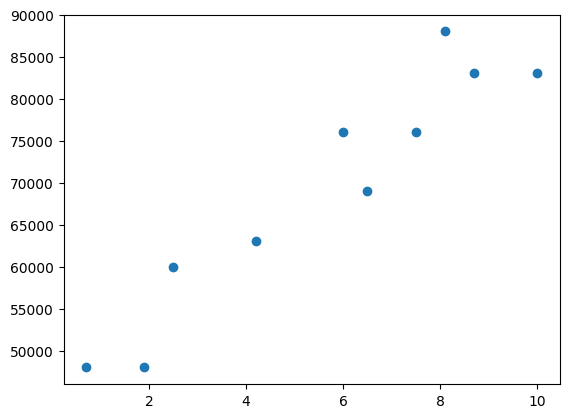

In [39]:
import matplotlib.pyplot as plt

salaries = [salary for salary, tenure in salaries_and_tenures]
tenures = [tenure for salary, tenure in salaries_and_tenures]

plt.scatter(tenures, salaries)

In [45]:
# Keys are years, values are lists of the salaries for each tenure.
salary_by_tenure = defaultdict(list)

for salary, tenure in salaries_and_tenures:
    salary_by_tenure[tenure].append(salary)

# Keys are years, each value is average salary for that tenure.
average_salary_by_tenure = {
    tenure: sum(salaries) / len(salaries)
    for tenure, salaries in salary_by_tenure.items()
}

average_salary_by_tenure

{8.7: 83000.0,
 8.1: 88000.0,
 0.7: 48000.0,
 6: 76000.0,
 6.5: 69000.0,
 7.5: 76000.0,
 2.5: 60000.0,
 10: 83000.0,
 1.9: 48000.0,
 4.2: 63000.0}

In [42]:
def tenure_bucket(tenure):
    if tenure < 2:
        return "less than two"
    elif tenure < 5:
        return "between two and five"
    else:
        return "more than five"

In [43]:
# Keys are tenure buckets, values are lists of salaries for that bucket.
salary_by_tenure_bucket = defaultdict(list)

for salary, tenure in salaries_and_tenures:
    bucket = tenure_bucket(tenure)
    salary_by_tenure_bucket[bucket].append(salary)

salary_by_tenure_bucket

defaultdict(list,
            {'more than five': [83000, 88000, 76000, 69000, 76000, 83000],
             'less than two': [48000, 48000],
             'between two and five': [60000, 63000]})

In [44]:
# Keys are tenure buckets, values are average salary for that bucket.
average_salary_by_bucket = {
    tenure_bucket: sum(salaries) / len(salaries)
    for tenure_bucket, salaries in salary_by_tenure_bucket.items()
}

average_salary_by_bucket

{'more than five': 79166.66666666667,
 'less than two': 48000.0,
 'between two and five': 61500.0}

### Paid Accounts

In [48]:
pay_for_account = [(0.7, 'paid'),
                   (1.9, 'unpaid'),
                   (2.5, 'paid'),
                   (4.2, 'unpaid'),
                   (6.0, 'unpaid'),
                   (6.5, 'unpaid'),
                   (7.5, 'unpaid'),
                   (8.1, 'unpaid'),
                   (8.7, 'paid'),
                   (10.0, 'paid')]

def predict_paid_or_unpaid(years_experience):
    if years_experience < 3.0:
        return "paid"
    elif years_experience < 8.5:
        return "unpaid"
    else:
        return "paid"

predict_paid_or_unpaid(3.0) # 'paid'

'unpaid'

### Topics of Interest

In [50]:
words_and_counts = Counter(word
                           for user, interest in interests
                           for word in interest.lower().split())

for word, count in words_and_counts.most_common():
    if count > 1:
        print(word, count)

big 3
data 3
java 3
python 3
learning 3
hadoop 2
hbase 2
cassandra 2
scikit-learn 2
r 2
statistics 2
regression 2
probability 2
machine 2
neural 2
networks 2
